# Modelo de clasificación para Diabetes con un perceptrón

El perceptrón tendrá 8 entradas de atributos y una salida. La idea aquí es entrenar un perceptrón utilizando Tensorflow / Keras para ir acostumbándonos a la API Keras de la plataforma de TensorFlow.

A diferencia de nuestra programación que hicimos inicialmente "a mano" del perceptrón, veamos aquí como lo hacemos con Keras.


In [1]:
# Carga de paquetes y dependencias

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import io


In [ ]:
# Carga de datos alternativa 1: desde el PC
# Importar csv al directorio de GoogleColab:

from google.colab import files

uploaded = files.upload()

Saving pima_dataset.csv to pima_dataset.csv


In [2]:
# # Carga de datos alternativa 2: desde el GitHub

# https://www.kaggle.com/uciml/pima-indians-diabetes-database

# NOTA: ES IMPORTANTE TENER CARGADO EL CSV EN EL MISMO DIRECTORIO DONDE ESTA EL SCRIPT.

# Context:
# This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
# The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain
# diagnostic measurements included in the dataset. Several constraints were placed on the selection of these
# instances from a larger database. In particular, all patients here are females at least 21 years old of Pima
# Indian heritage.

# Content:
# The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor
# variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Acknowledgements
# Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning
# algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications
# and Medical Care (pp. 261--265). IEEE Computer Society Press.

# Clase:
# Y = {0,1} =  {sin diabetes, diabetes}

#dataset = np.loadtxt('pima_dataset.csv', delimiter=',')
#dataset = np.genfromtxt("pima_dataset.csv", delimiter=",", skip_header=1) # sin cargar header

# ALTERNATIVA 1 PARA IMPORTAR CSV's
# dataset = pd.read_csv(io.BytesIO(uploaded['pima_dataset.csv']))

# ALTERNATIVA 2 PARA IMPORTAR CSV'S
url = 'https://raw.githubusercontent.com/MAValle/deepLearning_intro_course/main/pima_dataset.csv'
dataset = pd.read_csv(url)
dataset.head()
column_names = list(dataset.columns)

In [4]:
# No olvidemos escalar los datos!
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = dataset.columns[dataset.columns != 'Outcome']
dataset[cols] = scaler.fit_transform(dataset[cols])
df = dataset # para utilizar df despues.
dataset.head()




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [ ]:
# dataset es dataframe

# vamos a convertir dataset a array:
dataset = dataset.to_numpy()
dataset

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.10119556, 0.03333333,
        0.        ]])

In [ ]:
# seleccionamos los atributos de entrada X  y la clase Y

X = dataset[:, 0:8]
Y = dataset[:, 8]

In [ ]:
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
# Ahora creamos el modelo y agregamos el perceptron, es cual es una Dense layer

model = Sequential()

#model.add(Dense())
#from tensorflow.keras.activations import hard_sigmoid

# Al inicializar model.add(Dense()) tendremos un problema!
# KERAS no esta diseñado para crear perceptrones. KERAS nos obliga a definir una función de activación
# que sea "continua" y ademas una "inicializacion" o metodo de optimizacion (lo veremos mas adelante)

# Explicación más detallada
# Para el perceptrón, nosotros usamos la funcion sgn, que no es continua! (no es diferenciable), condición
# que es necesaria para la optimizacion (por ejemplo, el Gradient Descent).
# Recordemos que los pesos en un perceptron se ajustan "empujándolos" en la dirección correcta (Learning rule).
# Pero en KERAS para entrenar redes neuronales, esto se hace a través de una función de perdida que es diferenciable
# (lo veremos mas adelante). Al minimizar este gradiente, el algoritmo encuentra la manera de ajustar
# los pesos. Esto se denomina Stochastic gradient descent. O sea, en vez de empujar los pesos en la dirección
# correcta, es como descender montañas por la pendiente más pronunciada.

# Como no podemos usar la función sgn, utilizamos una versión continua, muy similar y que es diferenciable y se
# llama sigmoide:

# sig(t) = 1/(1+e^(-t))

# por lo tanto, incializamos así:
# model.add(Dense(units = 1, activation='hard_sigmoid'))

# Mas detalle: En realidad, la hard_sigmoid es una aproximación por trazos lineales de la sigmoide.
# Para tener una idea ver https://stackoverflow.com/questions/35411194/how-is-hard-sigmoid-defined


In [ ]:
# Pero también decimos que el perceptron tendra 8 entradas (8 pesos)
#model.add(Dense(1, input_shape=(8,), activation=hard_sigmoid, kernel_initializer='glorot_uniform'))
model.add(Dense(1, input_shape=(8,), activation='hard_sigmoid', kernel_initializer='random_uniform'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Ahora compilamos el modelo y lo inicializamos
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Nota:
# La funcion de perdida que se utiliza para poder ir ajustando los pesos es la binary-cross-entropy que es
# que se utiliza por defecto en la mayoría de las aplicaciones de clasificación
# (Chollet, F. (2017). Deep Learning with Python. New York, NY: Manning Publications.)
# El optimizador Adam es una estensión del gradient descent para ir ajustando los pesos.



In [ ]:
# hacemos fit de datos en este psudo perceptron (entrenamiento).
# Presentamos los datos a nuestro pseudo perceptron. Esto le dice a Keras que comience el proceso de
# entrenamiento.

history = model.fit(X, Y, epochs=100, batch_size=25, verbose=0, validation_split=0.2)

# epochs = numero de iteraciones del proceso de aprendizaje optimizacion antes de parar el proceso de aprendizaje
# batch_size = tamaño de las muestras durante cada iteracion
# verbose = 1 lo dejamos en 1 para ver que va sucediendo
# split = 0.3  tomamos un 20% de los datos como set de validacion para evitar el overfitting.


In [ ]:
# Vemos que el accuracy logra superar ligeramente el 60%.

# Nota: Accuracy es una medida de desempeño que mide la capacidad del clasificador (en este caso, del perceptron)
# para clasificar correctamente si la instancia es diabética o no.

# No es un problema de clasificacion facil. Pensemos que estamos tratando de clasificar con solo un
# perceptron (lineal). A pesar de eso, los resultados son notables.

# Hemos visto cómo usar Keras como crear un perceptron (o al menos simular uno). No podemos crear un perceptron
# ideal con Keras porque utiliza una funcion de activacion no diferenciable.


# Referencias adicionales
# Ariosa, R. (2018, April 27). MrRobb/keras-zoo. Retrieved from https://github.com/MrRobb/keras-zoo/blob/master/P%20(Perceptron)/readme.md
# Chollet, F. (2017). Deep Learning with Python. New York, NY: Manning Publications.
# Rosenblatt, F. (1957). The Perceptron – a Perceiving and Recognizing Automaton. Retrieved from UMass website: https://blogs.umass.edu/brain-wars/files/2016/03/rosenblatt-1957.pdf
# Zakaria, Y. (2016, November 23). Non-smooth and non-differentiable customized loss function tensorflow. Retrieved from https://stackoverflow.com/a/40758135

Text(0, 0.5, 'Accuracy')

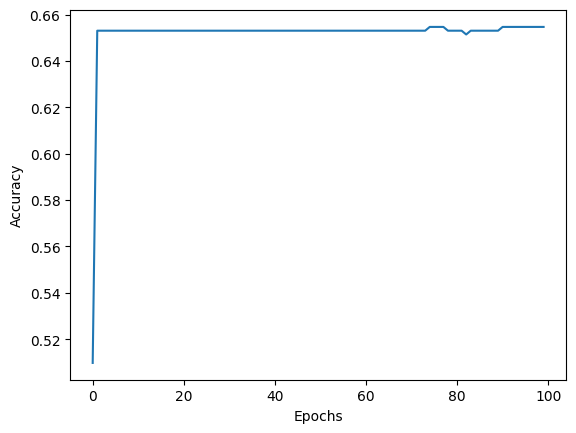

In [ ]:
# Veamos cómo se desarrolla el accuracy en las iteraciones
# https://stackoverflow.com/questions/61401114/neural-network-perceptron-visualizing-decision-boundary-as-a-hyperplane-wh

import matplotlib.pyplot as plt #cargamos paquete para graficar

epochs = range(len(history.epoch))  #creamos un vector rango de 0 a 255

# Nota si inspeccionamos print(history.history) veremos que esta lista contiene:
# loss, acc, val_loss, val_acc
#print(history.history)

plt.figure()
plt.plot(epochs, history.history['accuracy'])
#plt.plot(epochs, history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')



Text(0, 0.5, 'Loss')

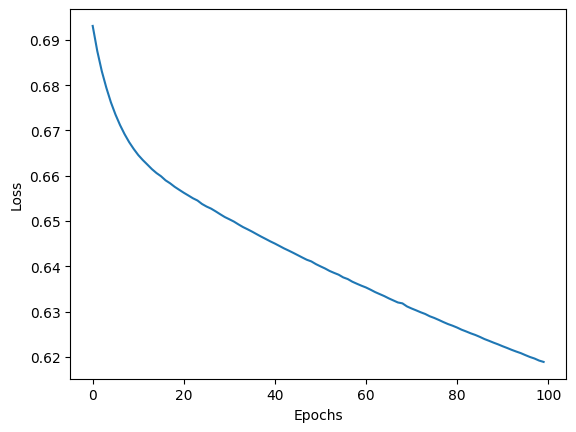

In [ ]:
# Veamos un plot de la funcion de perdida a traves de las iteraciones

plt.figure()
plt.plot(epochs, history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
# ¿podemos ver los pesos sinápticos finales?

#extract weights and bias from model
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

#w1 = weights[0][0] #a
#w2 = weights[1][0] #b
#w3 = weights[2][0] #c
#b = biases[0]      #d

In [ ]:
print(biases)

[-0.93544483]


In [ ]:
print(weights)

print(column_names)

[[ 0.5923886 ]
 [ 0.2784683 ]
 [-0.6901338 ]
 [-0.22271667]
 [ 0.7623882 ]
 [-0.06671926]
 [ 0.51141983]
 [ 0.7706536 ]]
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
# Que interesante!
# De que manera se podrian interpretar estos pesos?

0.0

#### Veamos un PCA a los features
Coloreamos cada instancia proyectados en un plano 2D de las dos primeras componentes de los features.

¿qué tan complejo es este problema clasificación  para  el perceptrón?

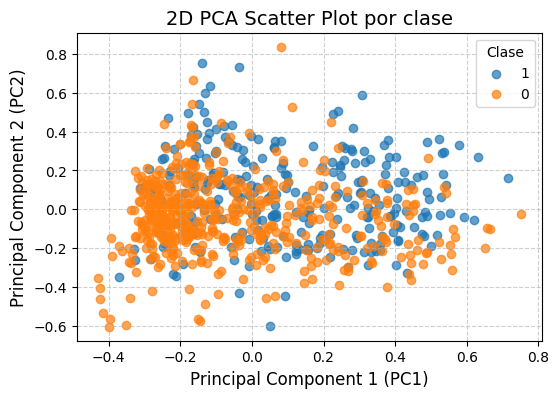

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1:
X = df.drop('Outcome', axis=1)  # Features (8 columns)
y = df['Outcome']  # Class labels

# Step 2: Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y

# Step 4: Plot
plt.figure(figsize=(6, 4))
for class_label in pca_df['Class'].unique():
    class_data = pca_df[pca_df['Class'] == class_label]
    plt.scatter(class_data['PC1'], class_data['PC2'], label=class_label, alpha=0.7)

# Add labels and title
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.title('2D PCA Scatter Plot por clase', fontsize=14)
plt.legend(title='Clase', fontsize=10)

# Show the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
